##Подгрузка датасета

In [ ]:
!gdown --id 1I7w6Y4xcPmsA-rYLhhkCJupglvGN8Eg2

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1I7w6Y4xcPmsA-rYLhhkCJupglvGN8Eg2
To: /content/GROOPBYCHECROI.csv
100% 1.26M/1.26M [00:00<00:00, 136MB/s]


## Подгрузка данных в питон и начало работы с ними

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('GROOPBYCHECROI.csv') #подругрузка файла

In [ ]:
df = pd.DataFrame(dataset)

##Отключение ограничения показа всех строк таблиц

In [ ]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)

##Подключение библиотек

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.options.display.max_rows = 8 #параметр отображения графиков

import warnings
warnings.filterwarnings('ignore') #отключение предупреждений библиотек

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Подготовка и просмотр датасета

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               886 non-null    object
 1   name_school        886 non-null    object
 2   price all          886 non-null    int64 
 3   price sellary      886 non-null    int64 
 4   kredit_v_monce     886 non-null    int64 
 5   dlitelnost         886 non-null    object
 6   tip_prof           886 non-null    object
 7   ocenka             886 non-null    object
 8   plus               738 non-null    object
 9   minus              737 non-null    object
 10  uroven_podgotovki  728 non-null    object
 11  komu               880 non-null    object
 12  chemy_nauchitsy    536 non-null    object
 13  programm           606 non-null    object
 14  napravleniya       886 non-null    object
 15  tehnologii         758 non-null    object
 16  soft_skills        818 non-null    object
 1

Анализируемые столбцы не все имеют нужный тип данных, например оценка и длительность.

###Очистим столбец Оценка

In [ ]:
df['ocenka'] = df['ocenka'].replace(r'/10',"",regex=True)
df[['ocenka']] = df[['ocenka']].astype(float)

###Очистим столбец Длительность обучения

In [ ]:
df['dlitelnost'] = df['dlitelnost'].str.replace(r"[^\d\.]", "", regex=True)
df[['dlitelnost']] = df[['dlitelnost']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               886 non-null    object 
 1   name_school        886 non-null    object 
 2   price all          886 non-null    int64  
 3   price sellary      886 non-null    int64  
 4   kredit_v_monce     886 non-null    int64  
 5   dlitelnost         886 non-null    int64  
 6   tip_prof           886 non-null    object 
 7   ocenka             886 non-null    float64
 8   plus               738 non-null    object 
 9   minus              737 non-null    object 
 10  uroven_podgotovki  728 non-null    object 
 11  komu               880 non-null    object 
 12  chemy_nauchitsy    536 non-null    object 
 13  programm           606 non-null    object 
 14  napravleniya       886 non-null    object 
 15  tehnologii         758 non-null    object 
 16  soft_skills        818 non

Типы данных соответствуют анализу.

##Проверим зависимость стоимости курса от рейтинга школы и длительности обучения

Мы готовы совершить ошибку первого рода с вероятностью 0.05 (сравниваем с p-value)

---



###Фильтрация датафрейма по цене со скидкой,т.к. анализ по столбцу полной цены не целесообразен (скидка может быть фиктивная). У 200 курсов из 800 цена со скидкой не указана, можно ее не ввключать в выборку.

In [ ]:
df1 = df[df['price sellary'] > 0]

#Проведем статистический анализ курсов Аналитик данных

In [ ]:
df2 = df1[df1["name_all"] == "Аналитик данных"]

##Создадим новый датафрейм со столбцами оценка, длительность, стоимость

In [ ]:
df3 = df2[['ocenka','dlitelnost','price sellary']]
df3

,ocenka,dlitelnost,price sellary
23,10.0,12,106172
68,9.8,11,78000
72,9.8,12,74900
99,9.5,12,109500
...,...,...,...
733,8.7,8,84000
741,8.5,4,71044
786,8.4,2,5600
867,8.0,6,41900


##Описательные статистики

Посмотрим описательные статистики для числовых переменных, т.е. для средней заработной платы

In [ ]:
df3[['ocenka','dlitelnost','price sellary']].describe()

,ocenka,dlitelnost,price sellary
count,38.000000,38.000000,38.000000
mean,8.392105,6.315789,62690.973684
std,0.881762,4.714012,35633.696159
min,6.300000,1.000000,5000.000000
25%,7.700000,4.000000,40325.000000
50%,8.550000,6.000000,63950.000000
75%,9.000000,6.750000,82144.000000
max,10.000000,24.000000,162000.000000


Средняя стоимость курса аналитика данных 62690 руб, максимальная стоимость 162000, минимальная 5000.
Среднее значение длительности чуть более 6 месяцев, минимальное 1 месяц, максимальное 24 месяца.
Средняя оценка курсов по аналитике данных 8.4, мин. 6.3,макс. 10 баллов.

##Проверка нормальности по критерию Шапиро-Уилка 
Нулевая гипотеза о том, что стоимость курсов подчиняется нормальному закону распрееления. 

In [ ]:
stats.shapiro(df3['price sellary'])

ShapiroResult(statistic=0.9687438607215881, pvalue=0.3590436279773712)

pvalue=0.359 больше, чем 0.05, следовательно не можем отклонить нулевую гипотезу, делаем вывод, что данные, скорее всего, взяты из гауссовского распределения.(можно работать как с нормальной и применять парамерические критерии)

In [ ]:
df3[['ocenka','dlitelnost','price sellary']].mean() # среднее

ocenka               8.392105
dlitelnost           6.315789
price sellary    62690.973684
dtype: float64

In [ ]:
df3[['ocenka','dlitelnost','price sellary']].std()  # средне квадратическое отклонение. На сколько в стреднем отклоняется значение от среднего

ocenka               0.881762
dlitelnost           4.714012
price sellary    35633.696159
dtype: float64

In [ ]:
df3[['ocenka','dlitelnost','price sellary']].skew() # коэффициент асимметрии: есл положительные, говорит о левостороннем смещении макушки графика

ocenka          -0.047923
dlitelnost       1.766345
price sellary    0.557838
dtype: float64

In [ ]:
df3[['ocenka','dlitelnost','price sellary']].kurtosis() # коэффициент эксцесса: если отрицательный- плосковершинность.

ocenka          -0.628399
dlitelnost       4.263077
price sellary    0.251868
dtype: float64

###Гистограмма распределения стоимости курсов

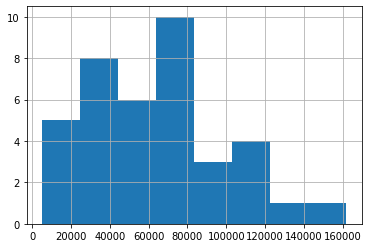

In [ ]:
df3['price sellary'].hist(bins=8)

# **Нулевая гипотеза №1** Рейтинг школы не влияет на ценообразование (Анализ влияния количественных признаков. Критерии сравнения групп.) 
Данные количественные, распределение нормальное, количество групп 2, поэтому применяем Критерий Стьюдента.

##Описательные статистики

Рассмотрим как выглядит среднее значение цены курсов в зависимости от рейтинга школы

In [ ]:
df3.groupby('ocenka')[['price sellary']].mean()

,price sellary
ocenka,
6.3,5000.0
7.2,25550.0
7.3,61500.0
7.5,52312.5
...,...
9.5,109500.0
9.6,104750.0
9.8,76450.0
10.0,106172.0


Из таблицы уже видим, что минимальной оценке соответствует маленькая цена курса, также с повышением рейтинга цена не всегда, но возрастает.

##Количество наблюдений

In [ ]:
df3['ocenka'].value_counts()

8.7    5
7.5    4
8.0    3
7.8    3
      ..
7.2    1
9.3    1
9.5    1
8.4    1
Name: ocenka, Length: 20, dtype: int64

In [ ]:
df3.groupby('ocenka')[['price sellary']].count()

,price sellary
ocenka,
6.3,1
7.2,1
7.3,2
7.5,4
...,...
9.5,1
9.6,2
9.8,2
10.0,1


Количество соответствий цены и оценки.

##Гистограмма зависимости Средней заработной платы от опыта работы

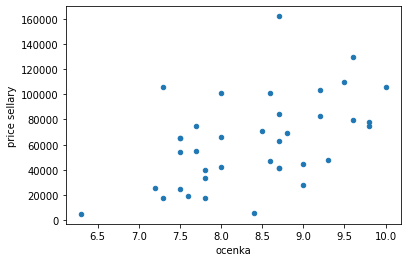

In [ ]:
df3.plot('ocenka','price sellary',kind="scatter")

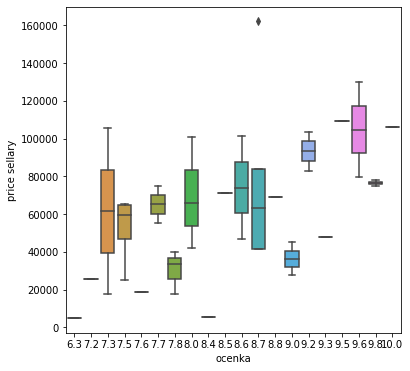

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='ocenka', y='price sellary', data=df3)

Из графика видим, что зависимость стоимости курсов от оценки неочевидна.